In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('hk_sports_centres.csv')

In [3]:
dataset.head()

,GMID,Dataset,Facility Name,Address,數據集,設施名稱,地址,District,地區,Facility Type,...,傳真號碼,Email Address,電郵地址,Website,網頁,Northing,Easting,Latitude,Longitude,Last Update
0,HxiWNNWV1l,Sports Centres,Cheung Fat Sports Centre,"4/F, Cheung Fat Plaza, Cheung Fat Estate, Tsin...",體育館,長發體育館,青衣長發邨長發廣場四樓,KWAI TSING,葵青,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",...,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,http://www.lcsd.gov.hk/tc/facilities/facilitie...,824815.0,828627.0,22.362432,114.103057,2021-02-19 07:55:52
1,ExLfbnP6ic,Sports Centres,Che Kung Temple Sports Centre,"No. 10, Sha Tin Tau Road, Sha Tin",體育館,車公廟體育館,沙田沙田頭路10號,SHA TIN,沙田,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",...,2790 0238,cktsc@lcsd.gov.hk,cktsc@lcsd.gov.hk,N.A.,N.A.,825894.0,837164.0,22.372228,114.185574,2020-07-06 04:20:00
2,uyoeQh3vef,Sports Centres,Siu Lun Sports Centre,"2-5/F Tuen Mun Siu Lun Government Complex, 19 ...",體育館,兆麟體育館,新界屯門兆麟街19號屯門兆麟政府綜合大樓2至5樓,TUEN MUN,屯門,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",...,2659 2411,slsc@lcsd.gov.hk,slsc@lcsd.gov.hk,https://www.lcsd.gov.hk/en/facilities/faciliti...,https://www.lcsd.gov.hk/tc/facilities/faciliti...,827239.0,815911.0,22.384254,113.979199,2020-06-29 03:02:41
3,BzPifUxKW8,Sports Centres,Hong Kong Park Sports Centre,"29 Cotton Tree Drive, Central",體育館,香港公園體育館,中環紅棉路29號,CENTRAL AND WESTERN,中西區,"BADMINTON COURTS,BASKETBALL COURTS,DANCE ROOMS...",...,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,http://www.lcsd.gov.hk/tc/facilities/facilitie...,815387.0,834456.0,22.277344,114.159292,2018-12-03 06:39:08
4,uKWfLywRHi,Sports Centres,Tsuen Wan Sports Centre,"53 Wing Shun Street, Tsuen Wan, N.T.",體育館,荃灣體育館,荃灣永順街53號,TSUEN WAN,荃灣,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",...,24049055,tsuenwansc@lcsd.gov.hk,tsuenwansc@lcsd.gov.hk,https://www.lcsd.gov.hk/tc/facilities/faciliti...,https://www.lcsd.gov.hk/tc/facilities/faciliti...,825200.0,829651.0,22.365955,114.112636,2018-12-03 04:21:00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GMID           104 non-null    object 
 1   Dataset        104 non-null    object 
 2   Facility Name  104 non-null    object 
 3   Address        104 non-null    object 
 4   數據集            104 non-null    object 
 5   設施名稱           104 non-null    object 
 6   地址             104 non-null    object 
 7   District       104 non-null    object 
 8   地區             104 non-null    object 
 9   Facility Type  104 non-null    object 
 10  設施種類           104 non-null    object 
 11  Opening Hours  85 non-null     object 
 12  開放時間           85 non-null     object 
 13  Telephone      85 non-null     object 
 14  聯絡電話           85 non-null     object 
 15  Fax Number     86 non-null     object 
 16  傳真號碼           86 non-null     object 
 17  Email Address  87 non-null     object 
 18  電郵地址      

In [5]:
# Remove the duplicated columns

non_eng_cols = [4,5,6,8,10,12,14,16,18,20]
dataset.drop(dataset.columns[non_eng_cols], axis = 1, inplace = True)

In [6]:
dataset.head()

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Northing,Easting,Latitude,Longitude,Last Update
0,HxiWNNWV1l,Sports Centres,Cheung Fat Sports Centre,"4/F, Cheung Fat Plaza, Cheung Fat Estate, Tsin...",KWAI TSING,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,824815.0,828627.0,22.362432,114.103057,2021-02-19 07:55:52
1,ExLfbnP6ic,Sports Centres,Che Kung Temple Sports Centre,"No. 10, Sha Tin Tau Road, Sha Tin",SHA TIN,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",0700 - 2300 hrs,2790 0221,2790 0238,cktsc@lcsd.gov.hk,N.A.,825894.0,837164.0,22.372228,114.185574,2020-07-06 04:20:00
2,uyoeQh3vef,Sports Centres,Siu Lun Sports Centre,"2-5/F Tuen Mun Siu Lun Government Complex, 19 ...",TUEN MUN,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",7am to 11pm daily (except maintenance days),2659 2311,2659 2411,slsc@lcsd.gov.hk,https://www.lcsd.gov.hk/en/facilities/faciliti...,827239.0,815911.0,22.384254,113.979199,2020-06-29 03:02:41
3,BzPifUxKW8,Sports Centres,Hong Kong Park Sports Centre,"29 Cotton Tree Drive, Central",CENTRAL AND WESTERN,"BADMINTON COURTS,BASKETBALL COURTS,DANCE ROOMS...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,815387.0,834456.0,22.277344,114.159292,2018-12-03 06:39:08
4,uKWfLywRHi,Sports Centres,Tsuen Wan Sports Centre,"53 Wing Shun Street, Tsuen Wan, N.T.",TSUEN WAN,"ACTIVITY ROOMS,BADMINTON COURTS,BASKETBALL COU...",7 am to 11 pm daily (except maintenance day),23929570,24049055,tsuenwansc@lcsd.gov.hk,https://www.lcsd.gov.hk/tc/facilities/faciliti...,825200.0,829651.0,22.365955,114.112636,2018-12-03 04:21:00


In [7]:
# Create a Categorical Area column

NT = ['ISLANDS','KWAI TSING','NORTH','SAI KUNG','SHA TIN',
'TAI PO','TSUEN WAN','TUEN MUN','YUEN LONG']
KL = ['SHAM SHUI PO','KOWLOON CITY','KWUN TONG','WONG TAI SIN','YAU TSIM MONG']
HK = ['CENTRAL AND WESTERN','EASTERN','SOUTHERN','WAN CHAI']

def label_district(row):
    if row in NT:
        return "NT"
    elif row in HK:
        return "HK"
    elif row in KL:
        return "KL"

dataset['Area'] = dataset['District'].apply(lambda row : label_district(row))
dataset['Area'].value_counts()


NT    55
KL    30
HK    19
Name: Area, dtype: int64

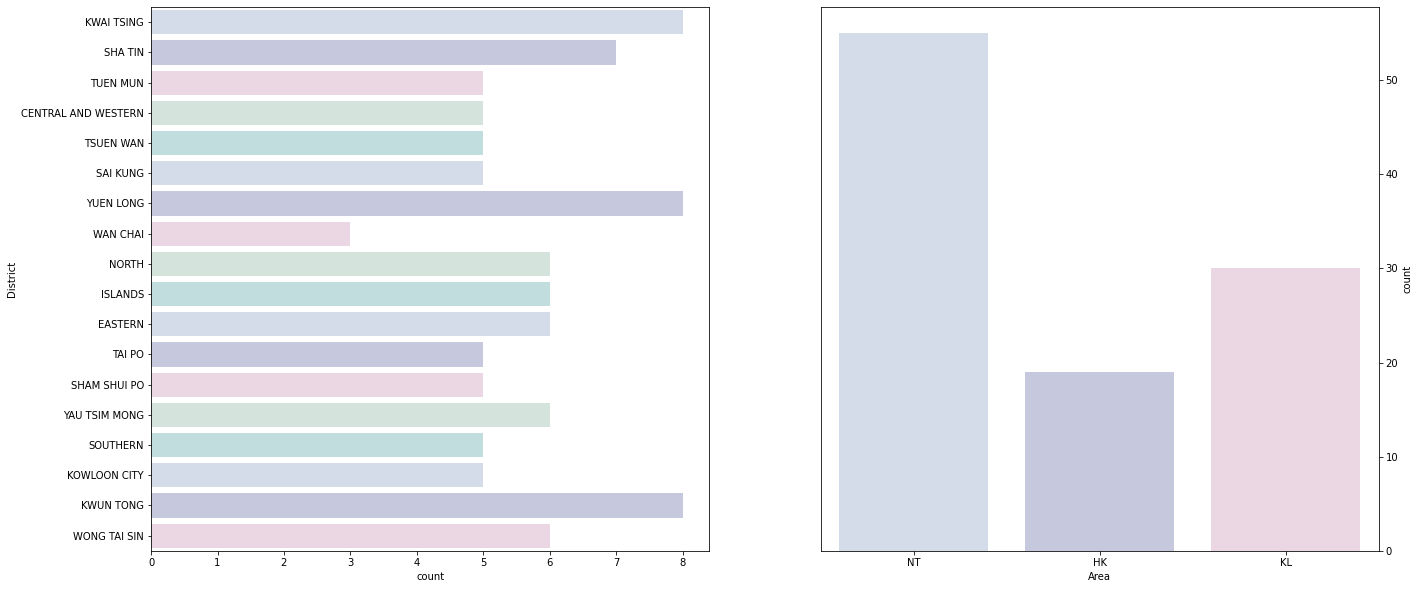

In [8]:
# Exploring the distribution of sports centres by district and area.

fig, axes = plt.subplots(1, 2, figsize = (22,10)) 

cols = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
sns.countplot(y = dataset['District'], palette = cols,
              ax = axes[0])
axes[0].grid(False)


sns.countplot(x = dataset['Area'],
             palette = cols, 
             #label = ,
             ax = axes[1])
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].grid(False)
#axes[1].legend()


In [63]:
dataset['Opening Hours'].value_counts()

N.A.                                                                                                                                                                                                                                                                            73
7 am to 11 pm daily                                                                                                                                                                                                                                                              2
7 am to 11 pm daily (except maintenance day)                                                                                                                                                                                                                                     2
24 hours daily                                                                                                                                                                 

In [64]:
dataset[dataset['Opening Hours'] == '24 hours daily']

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Northing,Easting,Latitude,Longitude,Last Update,Area,Facility type list
18,7jzyallSK9,Sports Centres,Tai Tau Leng Sitting-out Area,"Tai Tau Leng Village, Po Shek Wu Road, Sheung ...",NORTH,BADMINTON COURTS,24 hours daily,2679 2818,N.A.,N.A.,N.A.,840075.0,830754.0,22.500287,114.123291,2015-05-12 03:40:44,NT,[BADMINTON COURTS]


In [71]:
dataset['Facility Name'].apply(lambda x : " ".join(x.split(' ')[-2:])).value_counts()  # list to str


Sports Centre       99
Yuen Garden          1
No. 1                1
Sitting-out Area     1
No. 2                1
Sand Court           1
Name: Facility Name, dtype: int64

In [73]:
fac = dataset['Facility Name'].apply(lambda x : " ".join(x.split(' ')[-2:]))
fac[fac != 'Sports Centre']

17          Sand Court
18    Sitting-out Area
19         Yuen Garden
90               No. 1
91               No. 2
Name: Facility Name, dtype: object

In [66]:
# Another method

fac = dataset['Facility Name'].apply(lambda x : " ".join(x.split(' ')[-2:]))
special_fac = ['Yuen Garden', 'Sand Court', 'No. 2', 'No. 1', 'Sitting-out Area']
fac_index = []

for i in special_fac:
    fac_index.append(fac[fac == i].index)
fac_index

[Int64Index([19], dtype='int64'),
 Int64Index([17], dtype='int64'),
 Int64Index([91], dtype='int64'),
 Int64Index([90], dtype='int64'),
 Int64Index([18], dtype='int64')]

In [67]:
dataset.iloc[[17,18,19,90,91]]

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Northing,Easting,Latitude,Longitude,Last Update,Area,Facility type list
17,ubTCikZT4K,Sports Centres,Tin Yip Road Artificial Sand Court,"Tin Yip Road, Tin Shui Wai",YUEN LONG,"VOLLEYBALL COURTS,HANDBALL COURTS","Beach Volleyball Court<br/><br/>Every Monday, ...",2682 3197,N.A.,N.A.,N.A.,836110.0,818723.0,22.464399,114.006414,2015-05-13 04:01:55,NT,"[VOLLEYBALL COURTS, HANDBALL COURTS]"
18,7jzyallSK9,Sports Centres,Tai Tau Leng Sitting-out Area,"Tai Tau Leng Village, Po Shek Wu Road, Sheung ...",NORTH,BADMINTON COURTS,24 hours daily,2679 2818,N.A.,N.A.,N.A.,840075.0,830754.0,22.500287,114.123291,2015-05-12 03:40:44,NT,[BADMINTON COURTS]
19,5wh83GvZu0,Sports Centres,Tai Tsoi Yuen Garden,"Tai Tsoi Yuen Road, Cheung Chau",ISLANDS,GATEBALL COURTS,2 pm to 6 pm<br/><br/>Turf maintenance on ever...,2852 3220,N.A.,N.A.,N.A.,807386.0,821039.0,22.205031,114.029188,2014-03-20 09:36:29,NT,[GATEBALL COURTS]
90,oE9lBkYmBS,Sports Centres,Boundary Street Sports Centre No. 1,"200 Sai Yee Street, Mong Kok",YAU TSIM MONG,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,820730.0,835654.0,22.325595,114.170915,2010-01-13 10:40:35,KL,"[BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINT..."
91,EdpKzCZswi,Sports Centres,Boundary Street Sports Centre No. 2,"200 Sai Yee Street, Mong Kok",YAU TSIM MONG,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,820784.0,835614.0,22.326083,114.170526,2010-01-13 10:40:29,KL,"[BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINT..."


There are 24 types of facilities in the Sports Centres


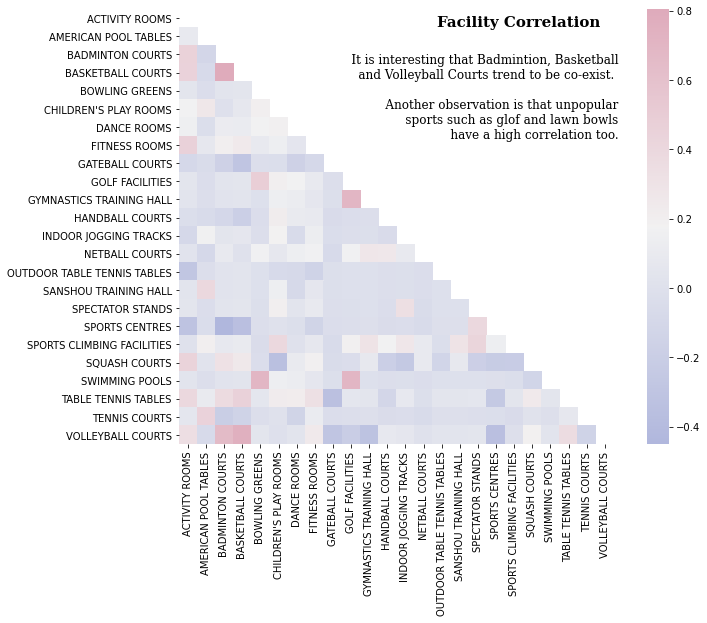

In [28]:
# Exploring the correlation between sports facilities

from sklearn.preprocessing import MultiLabelBinarizer

cmap = sns.diverging_palette(260, -10,
                            s = 50, l = 75, n = 6, 
                            as_cmap = True)

# New column for list of facilities
dataset['Facility type list'] = dataset['Facility Type'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in dataset['Facility type list']: Types += i
Types = set(Types)
print(f"There are {len(Types)} types of facilities in the Sports Centres")
test = dataset['Facility type list']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns = mlb.classes_, index = test.index) # return 104 rows with encoding 1 for existing facilities and 0 for null
corr = res.corr()  # facilities correlation DF 24x24
mask = np.zeros_like(corr, dtype = np.bool) # 24x24 False df
mask[np.triu_indices_from(mask)] = True # 24x24 upper triangle True df

fig, ax = plt.subplots(figsize = (12,8))

fig.text(.54,.85,'Facility Correlation', fontfamily='serif',fontweight='bold',fontsize=15)
fig.text(.75,.63,
            '''
             It is interesting that Badmintion, Basketball
             and Volleyball Courts trend to be co-exist. 
             
             Another observation is that unpopular
             sports such as glof and lawn bowls
             have a high correlation too.
             ''', fontfamily='serif',fontsize=12,ha='right')

pl = sns.heatmap(corr, mask = mask, cmap =cmap,
                square = True)


Over 90% of the Sports Centres consist of Badmintion, Volleyball and Basketball Courts, therefore they got a high correlation.


<ipython-input-159-47ba1a7e5012>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = total_fac.index,


Text(1, 0.5, '\nThe most common facilities we \ncan find in a Sports Centre, \nprimarily, Badminton Courts, \nwith Volleyball Courts and \nBasketball Courts behind.\n\nIt makes sense that govenment\nmight through promotion of\nthese kind of team sports, \nlet the kids learn \nthe art of discipline and\ncollaboration.\n')

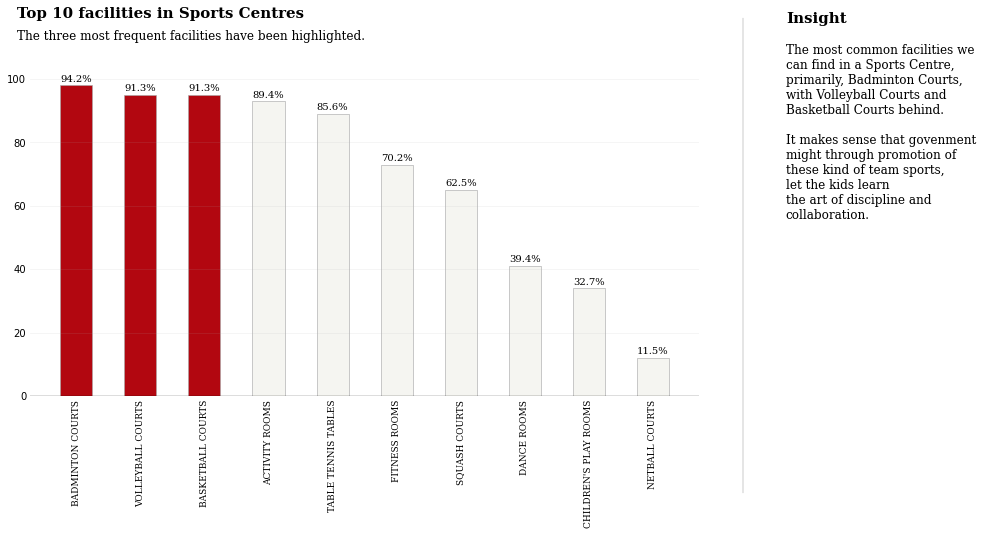

In [159]:
# Exploring the popular facilities with high correlation

print('Over 90% of the Sports Centres consist of Badmintion, Volleyball and Basketball Courts, therefore they got a high correlation.')

total_fac = res.sum(axis = 0).sort_values(ascending = False)[:10]

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#b20710' #color highlight

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(total_fac.index , total_fac, width = 0.5,
      edgecolor = 'darkgray', linewidth = 0.6, color = color_map)


for i in total_fac.index:
    ax.annotate(f"{total_fac[i]/len(dataset)*100:.3}%", xy = (i, total_fac[i] + 2),
                va = 'center', ha = 'center',
                fontfamily = 'serif', fontweight = 'light')
  
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

    
ax.set_xticklabels(labels = total_fac.index,
                   fontfamily= 'serif', fontsize = 9, rotation = 90)

ax.grid(axis = 'y', linestyle = '-', alpha = 0.15)
grid_y_ticks = np.arange(0, 120, 20)
ax.set_yticks(grid_y_ticks)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .9)

ax.tick_params(axis=u'both', which=u'both',length=0)


fig.text(0.11, 1, 'Top 10 facilities in Sports Centres', 
         fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.11, 0.95, 'The three most frequent facilities have been highlighted.', 
         fontsize=12, fontweight='light', fontfamily='serif')


import matplotlib.lines as lines

l1 = lines.Line2D([0.95, 0.95], [-.1, 1],
                  transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(1, 0.99, 'Insight', 
         fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1, 0.5, '''
The most common facilities we 
can find in a Sports Centre, 
primarily, Badminton Courts, 
with Volleyball Courts and 
Basketball Courts behind.

It makes sense that govenment
might through promotion of
these kind of team sports, 
let the kids learn 
the art of discipline and
collaboration.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')




In [56]:
# Exploring the unpopular facilities with high correlation

print('The unpopular sports almost stacked together, therefore they got high correlation.')
res[(res['GOLF FACILITIES'] == 1)|(res['BOWLING GREENS'] == 1)|(res['GYMNASTICS TRAINING HALL'] == 1)|(res['SWIMMING POOLS'] == 1)].T.reset_index().iloc[[4,9,10,20]]


The unpopular sports almost stacked together, therefore they got high correlation.


,index,31,85,97
4,BOWLING GREENS,1,1,0
9,GOLF FACILITIES,0,1,1
10,GYMNASTICS TRAINING HALL,0,0,1
20,SWIMMING POOLS,0,1,0


In [57]:
dataset.iloc[[31,85,97]]

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Northing,Easting,Latitude,Longitude,Last Update,Area,Facility type list
31,1cydaZdr9K,Sports Centres,Ap Lei Chau Sports Centre,"8 Hung Shing Street, Apleichau",SOUTHERN,"BASKETBALL COURTS,VOLLEYBALL COURTS,NETBALL CO...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,811748.0,834056.0,22.244481,114.155416,2010-01-13 10:48:50,HK,"[BASKETBALL COURTS, VOLLEYBALL COURTS, NETBALL..."
85,Ks0Zeqlua7,Sports Centres,Island East Sports Centre,"52 Lei King Road, Sai Wan Ho",EASTERN,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,816205.0,840948.0,22.284725,114.222287,2010-01-13 10:41:31,HK,"[BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINT..."
97,kUp9po8NdI,Sports Centres,Shun Lee Tsuen Sports Centre,"Shun Lee Tsuen Road, Kwun Tong",KWUN TONG,"BASKETBALL COURTS,NETBALL COURTS,BADMINTON COU...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,821184.0,841271.0,22.329688,114.225437,2010-01-13 10:39:29,KL,"[BASKETBALL COURTS, NETBALL COURTS, BADMINTON ..."


In [10]:
# exploring correlation of facilities in area
# create a new DataFrame for the area distribution of facilities

df_NT = dataset[dataset['Area'] == "NT"]
df_KL = dataset[dataset['Area'] == "KL"]
df_HK = dataset[dataset['Area'] == "HK"]

def facilities_count(dataset): 
    dataset['Facility type list'] = dataset['Facility Type'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in dataset['Facility type list']: Types += i
    Types = set(Types)
    #print("There are {} types of facilities in the Sports Centres")
    test = dataset['Facility type list']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns = mlb.classes_, index = test.index)
    facilities_count = res.sum(axis = 0).sort_values(ascending = False)
    return facilities_count

area_count = pd.DataFrame({"NT" : facilities_count(df_NT),
                           "KL" : facilities_count(df_KL),
                           "HK" : facilities_count(df_HK)}, 
                           index = facilities_count(dataset).index)

area_count = area_count.fillna(0).astype(int)
area_count


<ipython-input-10-03ebd4c03b80>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Facility type list'] = dataset['Facility Type'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))


,NT,KL,HK
BADMINTON COURTS,50,29,19
VOLLEYBALL COURTS,49,28,18
BASKETBALL COURTS,48,28,19
ACTIVITY ROOMS,49,26,18
TABLE TENNIS TABLES,44,28,17
FITNESS ROOMS,45,17,11
SQUASH COURTS,31,21,13
DANCE ROOMS,16,12,13
CHILDREN'S PLAY ROOMS,15,9,10
NETBALL COURTS,3,5,4


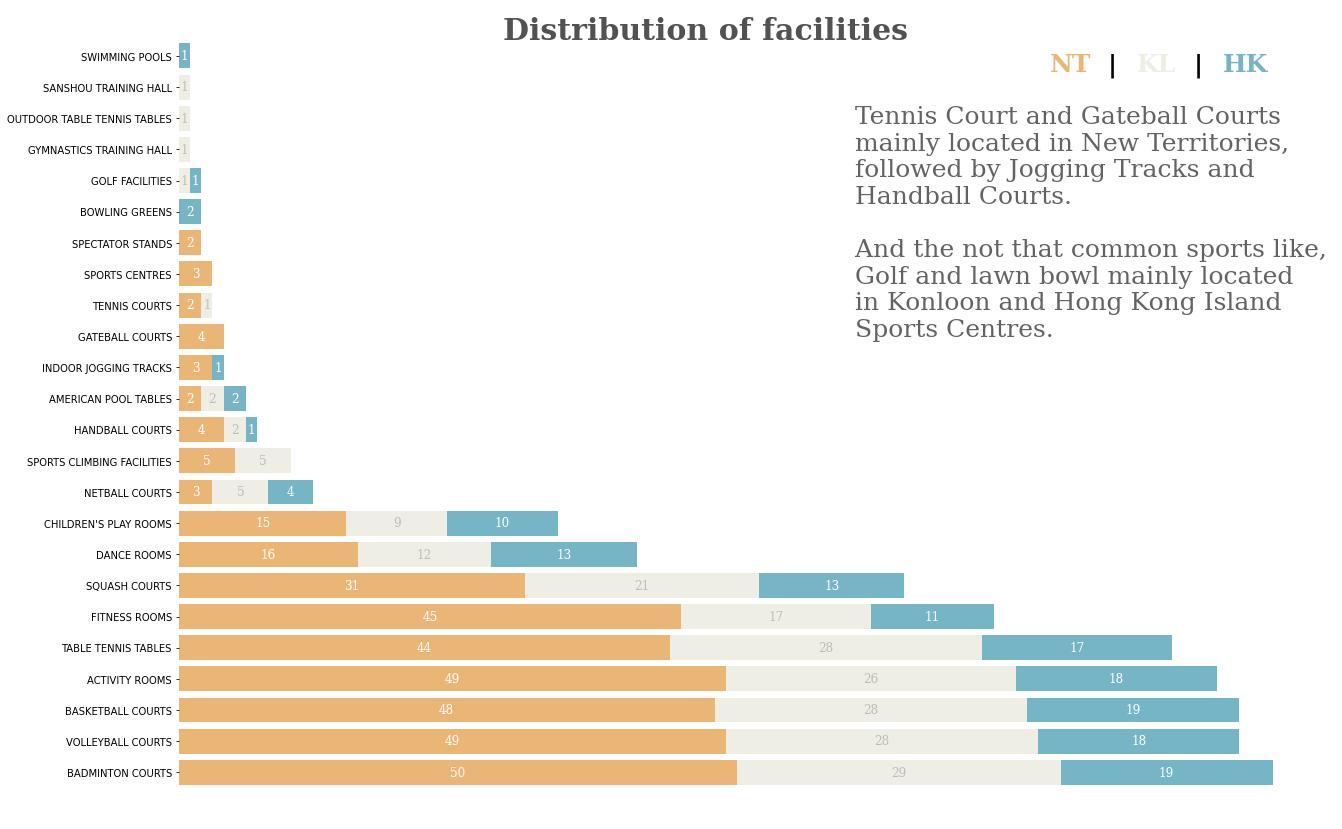

In [160]:
area_count


fig, ax = plt.subplots(figsize = (20,15))

ax.barh(area_count.index, area_count['NT'] + area_count['KL'] + area_count['HK'], color = '#76b5c5', 
       label = 'HK',)
ax.barh(area_count.index, area_count['NT'] + area_count['KL'], color = '#eeeee4',
       label = 'KL',)
ax.barh(area_count.index, area_count['NT'], color = '#eab676', 
       label = "NT")

ax.set_xlim(0, 100)
ax.set_xticks([])
ax.grid(False)


for i in area_count.index:
    if area_count['HK'][i] > 0:
        ax.annotate(f"{area_count['HK'][i]}", 
                   xy = (area_count['NT'][i] + area_count['KL'][i] + area_count['HK'][i]/2, i) ,
                   ha = 'center', va = 'center',
                   fontsize = 12, fontfamily = 'serif', fontweight = 'light', color = 'white')
for i in area_count.index:
    if area_count['KL'][i] > 0:
        ax.annotate(f"{area_count['KL'][i]}", 
                   xy = (area_count['NT'][i] + area_count['KL'][i]/2, i) ,
                   ha = 'center', va = 'center',
                   fontsize = 12, fontfamily = 'serif', fontweight = 'light', color = '#bdbdbd')
for i in area_count.index:
    if area_count['NT'][i] > 0:
        ax.annotate(f"{area_count['NT'][i]}", 
                   xy = (area_count['NT'][i]/2, i) ,
                   ha = 'center', va = 'center',
                   fontsize = 12, fontfamily = 'serif', fontweight = 'light', color = 'white')

        
        
fig.text(0.35, 0.85, 'Distribution of facilities', color = '#525252',
         fontsize=30, fontweight='bold', fontfamily='serif')
       
        
fig.text(0.73,0.82,"NT",
         fontweight="bold", fontfamily='serif', fontsize=25, color='#eab676')
fig.text(0.77,0.82,"|",
         fontweight="bold", fontfamily='serif', fontsize=25, color='black')
fig.text(0.79,0.82,"KL",
         fontweight="bold", fontfamily='serif', fontsize=25, color='#eeeee4')
fig.text(0.83,0.82,"|",
         fontweight="bold", fontfamily='serif', fontsize=25, color='black')
fig.text(0.85,0.82,"HK",
         fontweight="bold", fontfamily='serif', fontsize=25, color='#76b5c5')

fig.text(0.55, 0.55, 
        """
        Tennis Court and Gateball Courts
        mainly located in New Territories,
        followed by Jogging Tracks and
        Handball Courts.
        
        And the not that common sports like, 
        Golf and lawn bowl mainly located
        in Konloon and Hong Kong Island 
        Sports Centres.
        """,
        color = '#525252', alpha = 0.9, ha = 'left',
        fontsize=25, fontweight='light', fontfamily='serif')

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)




In [59]:
dataset[res['TENNIS COURTS'] == 1]

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Northing,Easting,Latitude,Longitude,Last Update,Area,Facility type list
33,72Zzw9WrNL,Sports Centres,Ho Man Tin Sports Centre,"1 Chung Yee street, Ho Man Tin",KOWLOON CITY,"TABLE TENNIS TABLES,AMERICAN POOL TABLES,ACTIV...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,819221.0,836718.0,22.311968,114.181242,2010-01-13 10:48:35,KL,"[TABLE TENNIS TABLES, AMERICAN POOL TABLES, AC..."
45,0ydU9SRptM,Sports Centres,North Kwai Chung Tang Shiu Kin Sports Centre,"292 Wo Yi Hop Road, Kwai Chung",KWAI TSING,"BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINTO...",NaN,NaN,NaN,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,826076.0,832218.0,22.373678,114.137531,2010-01-13 10:47:12,NT,"[BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINT..."
83,9r9fhG3Vwe,Sports Centres,Wo Hing Sports Centre,"8 Wo Ming Lane, Fanling",NORTH,"BASKETBALL COURTS,VOLLEYBALL COURTS,BADMINTON ...",N.A.,N.A.,N.A.,N.A.,http://www.lcsd.gov.hk/en/facilities/facilitie...,838355.0,832796.0,22.484754,114.143135,2010-01-13 10:41:45,NT,"[BASKETBALL COURTS, VOLLEYBALL COURTS, BADMINT..."


In [13]:
#fig, ax = plt.subplots()

In [14]:
dataset.describe()

,Northing,Easting,Latitude,Longitude
count,104.000000,104.000000,104.000000,104.000000
mean,823231.759615,832900.682692,22.348158,114.144178
std,7953.400001,8151.962341,0.071816,0.079142
min,807386.000000,812252.000000,22.205031,113.943831
25%,817835.250000,829797.250000,22.299406,114.114050
50%,821942.000000,834926.000000,22.336539,114.163843
75%,826814.500000,838361.000000,22.380540,114.197190
max,840595.000000,845681.000000,22.504979,114.268235
